# Deep neural networks

In [45]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel

import lightgbm as lgbm
from sklearn.linear_model import LogisticRegression

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [46]:
os.getcwd()


'C:\\Users\\MY BOOK\\Downloads\\Carnatic music Rhythm classification'

In [47]:
df=pd.read_excel('CMRfullDataset.xlsx')
#df_t=pd.read_csv('test_data.csv')
#print(df_t.head())
df.head()
df_train = df.drop(['MBID of the recording', 'Name','Artist','Release+Volume','Lead Instrument Code','Raaga'], axis = 1)

In [48]:
X=df_train.drop('Taala',axis=1).values
y=df_train['Taala'].values
print(X.shape)
print(y.shape)
#X_test=df_t.drop('label',axis=1).values
#y_test=df_t['label'].values


(176, 7)
(176,)


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)

## Deep Neural Network

In [50]:
import keras
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Input
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
from keras.models import Model
from keras.activations import relu
from keras.callbacks import History 
from keras.utils.vis_utils import plot_model
from keras.optimizers import Adam

In [51]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)
input_shape=X_train.shape[1]
y_train_nn=to_categorical(y_train,10,'int')
y_train_nn[:5]

array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [52]:
hist = History()

2 hidden layer with relu activation

In [53]:
model = Sequential()
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu', kernel_initializer='Orthogonal'))
model.add(Dense(50, input_shape=(X_test.shape[1],), activation='relu'))
model.add(Dense(1))
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error',metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=20, epochs=20, verbose=1)

Epoch 1/20
7/7 [==============================] - 0s 2ms/step - loss: 2.9611 - accuracy: 0.2955
Epoch 2/20
7/7 [==============================] - 0s 2ms/step - loss: 2.2546 - accuracy: 0.3258
Epoch 3/20
7/7 [==============================] - 0s 2ms/step - loss: 1.7765 - accuracy: 0.3485
Epoch 4/20
7/7 [==============================] - 0s 2ms/step - loss: 1.4078 - accuracy: 0.3864
Epoch 5/20
7/7 [==============================] - 0s 2ms/step - loss: 1.1186 - accuracy: 0.4621
Epoch 6/20
7/7 [==============================] - 0s 2ms/step - loss: 0.8269 - accuracy: 0.4621
Epoch 7/20
7/7 [==============================] - 0s 2ms/step - loss: 0.5982 - accuracy: 0.4773
Epoch 8/20
7/7 [==============================] - 0s 2ms/step - loss: 0.4036 - accuracy: 0.5227
Epoch 9/20
7/7 [==============================] - 0s 3ms/step - loss: 0.2579 - accuracy: 0.5303
Epoch 10/20
7/7 [==============================] - 0s 3ms/step - loss: 0.1597 - accuracy: 0.5606
Epoch 11/20
7/7 [======================

R-Squared: 0.961223


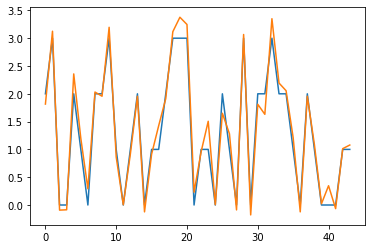

In [54]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
plt.plot(y_test)
plt.plot(y_pred)
print('R-Squared: %f'%(r2_score(y_test, y_pred)))

4 hidden layer relu activation

In [55]:
inp=Input(shape=(input_shape,))
model = Dense(500,activation='relu')(inp)
model = Dropout(0.3)(model)
model = Dense(8000,activation='relu')(model)
model = Dropout(0.2)(model)

model = Dense(1000,activation='relu')(model)
model = Dense(500,activation='relu')(model)
model = Dense(10,activation='softmax')(model)

model = Model(inputs=inp,outputs=model)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
lr=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,verbose=1)
es=EarlyStopping(monitor='val_loss',patience=20,verbose=1)
#plot_model(model)

In [56]:
model.fit(X_train, y_train_nn, epochs = 20, validation_split = .30, callbacks = [hist,lr,es])

Epoch 1/20
3/3 [==============================] - 1s 177ms/step - loss: 1.7351 - accuracy: 0.4565 - val_loss: 1.8438 - val_accuracy: 0.6000
Epoch 2/20
3/3 [==============================] - 0s 88ms/step - loss: 0.8466 - accuracy: 0.7609 - val_loss: 1.5592 - val_accuracy: 0.5500
Epoch 3/20
3/3 [==============================] - 0s 84ms/step - loss: 0.4908 - accuracy: 0.8152 - val_loss: 0.4037 - val_accuracy: 0.8750
Epoch 4/20
3/3 [==============================] - 0s 86ms/step - loss: 0.1985 - accuracy: 0.9130 - val_loss: 1.1642 - val_accuracy: 0.6250
Epoch 5/20
3/3 [==============================] - 0s 82ms/step - loss: 0.1563 - accuracy: 0.9130 - val_loss: 0.3468 - val_accuracy: 0.8750
Epoch 6/20
3/3 [==============================] - 0s 88ms/step - loss: 0.2097 - accuracy: 0.9457 - val_loss: 0.3471 - val_accuracy: 0.8000
Epoch 7/20
3/3 [==============================] - 0s 83ms/step - loss: 0.1375 - accuracy: 0.9239 - val_loss: 2.7767 - val_accuracy: 0.7000
Epoch 8/20
3/3 [==========

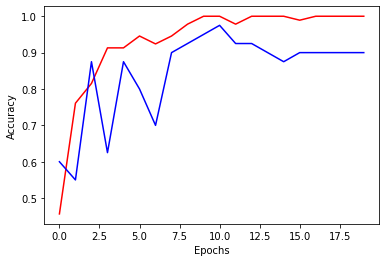

In [57]:
plt.plot(hist.history['accuracy'], color = 'red')
plt.plot(hist.history['val_accuracy'], color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

6 hidden layer using relu activation

In [58]:
inp=Input(shape=(input_shape,))
model = Dense(500,activation='relu')(inp)
model = Dropout(0.3)(model)
model = Dense(8000,activation='relu')(model)
model = Dropout(0.2)(model)
model = Dense(4000,activation='relu')(model)
model = Dropout(0.2)(model)
model = Dense(2000,activation='relu')(model)
model = Dropout(0.2)(model)
model = Dense(1000,activation='relu')(model)
model = Dense(500,activation='relu')(model)
model = Dense(10,activation='softmax')(model)

model = Model(inputs=inp,outputs=model)
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
lr=ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=3,verbose=1)
es=EarlyStopping(monitor='val_loss',patience=20,verbose=1)
#plot_model(model)

In [59]:
model.fit(X_train, y_train_nn, epochs = 20, validation_split = .30, callbacks = [hist,lr,es])

Epoch 1/20
3/3 [==============================] - 1s 384ms/step - loss: 2.1061 - accuracy: 0.2065 - val_loss: 1.5152 - val_accuracy: 0.3250
Epoch 2/20
3/3 [==============================] - 1s 277ms/step - loss: 1.3451 - accuracy: 0.4565 - val_loss: 1.2104 - val_accuracy: 0.5000
Epoch 3/20
3/3 [==============================] - 1s 271ms/step - loss: 0.7380 - accuracy: 0.6087 - val_loss: 0.9973 - val_accuracy: 0.4750
Epoch 4/20
3/3 [==============================] - 1s 279ms/step - loss: 0.5475 - accuracy: 0.6304 - val_loss: 1.2319 - val_accuracy: 0.6000
Epoch 5/20
3/3 [==============================] - 1s 271ms/step - loss: 0.8687 - accuracy: 0.6196 - val_loss: 0.8129 - val_accuracy: 0.6250
Epoch 6/20
3/3 [==============================] - 1s 284ms/step - loss: 0.3934 - accuracy: 0.8261 - val_loss: 1.2239 - val_accuracy: 0.8000
Epoch 7/20
3/3 [==============================] - 1s 278ms/step - loss: 0.2684 - accuracy: 0.9022 - val_loss: 2.5118 - val_accuracy: 0.8250
Epoch 8/20
3/3 [====

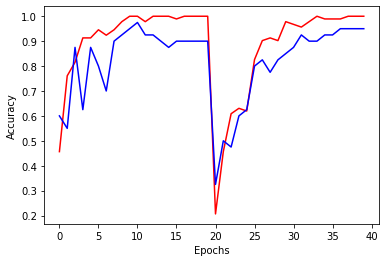

In [60]:
plt.plot(hist.history['accuracy'], color = 'red')
plt.plot(hist.history['val_accuracy'], color = 'blue')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()